In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [48]:
events_df = pd.read_csv("../Data/interim/events.csv")
people_df = pd.read_csv("../Data/interim/people.csv")

In [49]:
events_df.head()

,Unnamed: 0,Area of Impact,Case Number,Event Number,Standard of Evenidence,Vehicle 1,Vehicle 2
0,0,Non-Collision,60005,1,Rollover/Overturn,1,9999
1,1,Other Objects Set-In-Motion,60005,2,Motor Vehicle In-Transport Strikes or is Struc...,1,2
2,2,Not Reported,60005,3,Motor Vehicle In-Transport,1,2
3,3,Non-Collision,60005,4,Fire/Explosion,1,9999
4,4,Non-Collision,60005,5,Fire/Explosion,2,9999


In [50]:
list(events_df.columns)

['Unnamed: 0',
 'Area of Impact',
 'Case Number',
 'Event Number',
 'Standard of Evenidence',
 'Vehicle 1',
 'Vehicle 2']

In [51]:
people_df.head()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Age,Age Name,Case Number,County,DOA Name,Day of Week,...,Accident ZIP,Unnamed: 0_y,Unnamed: 0.1_y,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode
0,0,0,0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,...,92108.0,30394.0,30394.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0
1,1,1,1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,...,92108.0,30394.0,30394.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0
2,2,2,2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,...,92028.0,31575.0,31575.0,40.5,48103.0,6033.0,65168.0,29776.0,ZCTA5 92028,92028.0
3,3,3,3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,...,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,4,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,...,92154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
list(people_df.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'Unnamed: 0.1_x',
 'Unnamed: 0.1.1',
 'Age',
 'Age Name',
 'Case Number',
 'County',
 'DOA Name',
 'Day of Week',
 'Death Day of Month',
 'Description of Veh Coll',
 'Drunk Driver',
 'Hour',
 'Injury Severity Name',
 'Lat',
 'Lng',
 'Make',
 'Make/Model',
 'Model',
 'Month',
 'Race',
 'Road Type',
 'Sex',
 'Speed Limit Exceeded',
 'Speed limit',
 'Time of Accident',
 'Traveled Speed Veh',
 'Type of Vehicle',
 'Vin Number',
 'Year',
 'ZIP Code',
 'Accident ZIP',
 'Unnamed: 0_y',
 'Unnamed: 0.1_y',
 'Median Age',
 'Population',
 'Poverty Count',
 'Household Income',
 'Per Capita Income',
 'Name',
 'Zipcode']

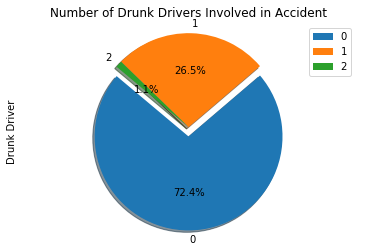

In [53]:
drunk_driver = people_df["Drunk Driver"].value_counts()
drunk_driver.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.title("Number of Drunk Drivers Involved in Accident")
plt.axis('equal')
plt.legend(loc="best")
plt.savefig("../Images/DrunkDrivers.png")

In [54]:
people_df["Speed Limit Exceeded"].value_counts()

No                                             3065
Yes, Too Fast for Conditions                    474
Yes                                             282
Unknown                                         113
Yes, Exceeded Speed Limit                        47
Yes, Specifics Unknown                           24
Reported as Unknown                              10
No Driver Present/Unknown if Driver Present       8
Yes, Racing                                       3
Name: Speed Limit Exceeded, dtype: int64

In [55]:
people_df["Speed Limit Exceeded"] = people_df["Speed Limit Exceeded"].replace({"Yes, Too Fast for Conditions": "Yes",
                                                                              "Yes, Exceeded Speed Limit": "Yes",
                                                                              "Yes, Specifics Unknown": "Yes",
                                                                              "Yes, Racing": "Yes",
                                                                              "Reported as Unknown": "Unknown",
                                                                              "No Driver Present/Unknown if Driver Present": "Unknown"})


Text(0.5, 1.0, 'Was the Driver Speeding?')

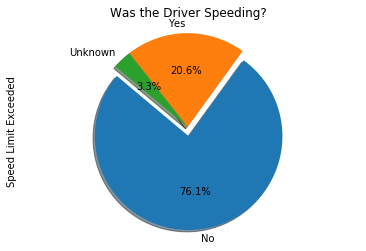

In [56]:
speeding = people_df["Speed Limit Exceeded"].value_counts()
speeding.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title('Was the Driver Speeding?')

In [57]:
day_of_week = people_df["Day of Week"].value_counts()
my_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week = [day_of_week[i] for i in my_order]
day_of_week

[537, 425, 384, 537, 564, 791, 788]

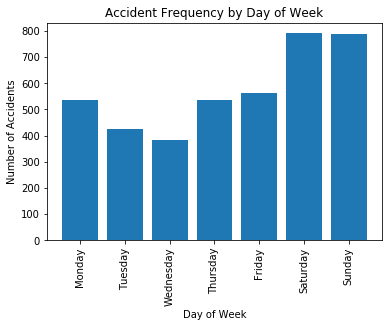

In [58]:
x_axis = np.arange(len(day_of_week))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, day_of_week)
plt.title("Accident Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.xticks(tick_locations, my_order, rotation=90)
plt.savefig("../Images/DayofWeek.png")

In [59]:
days = people_df.groupby("Day of Week")
days_drunk_df = pd.DataFrame(days["Drunk Driver"].value_counts())
days_drunk_df

Drunk Driver
Day of Week Drunk Driver              
Friday      0                      399
            1                      153
            2                       12
Monday      0                      399
            1                      134
            2                        4
Saturday    0                      492
            1                      292
            2                        7
Sunday      0                      501
            1                      266
            2                       21
Thursday    0                      450
            1                       87
Tuesday     0                      361
            1                       64
Wednesday   0                      311
            1                       71
            2                        2

In [60]:
days_drunk_df.loc['Friday'].loc[0]

Drunk Driver    399
Name: 0, dtype: int64

In [61]:
no_drunk_drivers = []
no_drunk_drivers = [days_drunk_df["Drunk Driver"][i][0] for i in my_order]

one_drunk_driver = []
one_drunk_driver = [days_drunk_df["Drunk Driver"][i][1] for i in my_order]

two_drunk_drivers = []
two_drunk_drivers = [days_drunk_df["Drunk Driver"][i][2] for i in my_order if i !="Tuesday"]
two_drunk_drivers.insert(1,0)
two_drunk_drivers

KeyError: 2

ValueError: shape mismatch: objects cannot be broadcast to a single shape

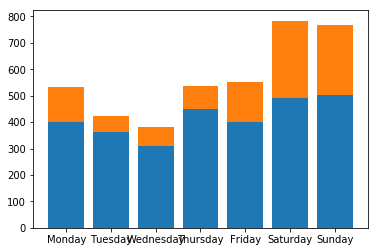

In [62]:
fig, ax = plt.subplots()

# Heights of bars1 + bars2
bars = np.add(no_drunk_drivers, one_drunk_driver).tolist()

ax.bar(my_order, no_drunk_drivers, label = "None")
ax.bar(my_order, one_drunk_driver, label = "One", bottom=no_drunk_drivers)
ax.bar(my_order, two_drunk_drivers, label = "Two", bottom=bars)

ax.set_ylabel('Number of Accidents')
ax.set_title('Number of Drunk Drivers in Accidents by Day of Week')
ax.set_xlabel('Day of Week')
plt.xticks(rotation=90)
ax.legend()

plt.savefig("../Images/DrunkDriversbyDayofWeek.png")
plt.show()

Text(0, 0.5, 'Number of Accidents')

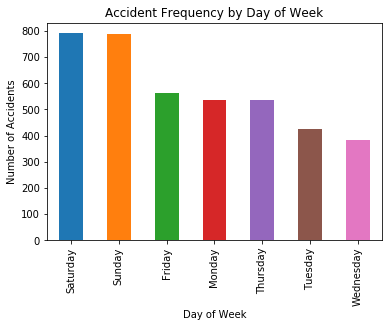

In [63]:
day_of_week = people_df["Day of Week"].value_counts()
day_of_week.plot(kind="bar")
plt.title("Accident Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")

In [64]:
# Create the bins in which Data will be held
bins = [0, 3, 7, 11, 15, 19, 24]

# Create the names for the four bins
group_names = ["Midnight - 3:59 a.m.", "4 a.m. - 7:59 a.m.", "8 a.m. - 11:59 a.m.", "Noon - 3:59 p.m.", "4 p.m. - 7:59 p.m.", "8 p.m. - 11:59 p.m."]

In [65]:
people_df["Time Range"] = pd.cut(people_df["Hour"], bins, labels=group_names, include_lowest=True)
people_df

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Age,Age Name,Case Number,County,DOA Name,Day of Week,...,Unnamed: 0_y,Unnamed: 0.1_y,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode,Time Range
0,0,0,0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,...,30394.0,30394.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
1,1,1,1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,...,30394.0,30394.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
2,2,2,2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,...,31575.0,31575.0,40.5,48103.0,6033.0,65168.0,29776.0,ZCTA5 92028,92028.0,4 p.m. - 7:59 p.m.
3,3,3,3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
4,4,4,4,4,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
5,5,5,5,5,55,55 Years,60008,SAN DIEGO (73),Not Applicable,Monday,...,30352.0,30352.0,38.2,44406.0,5447.0,72206.0,30750.0,ZCTA5 92019,92019.0,8 p.m. - 11:59 p.m.
6,6,6,6,6,36,36 Years,60008,SAN DIEGO (73),Not Applicable,Monday,...,30352.0,30352.0,38.2,44406.0,5447.0,72206.0,30750.0,ZCTA5 92019,92019.0,8 p.m. - 11:59 p.m.
7,7,7,7,7,28,28 Years,60008,SAN DIEGO (73),Not Applicable,Monday,...,30352.0,30352.0,38.2,44406.0,5447.0,72206.0,30750.0,ZCTA5 92019,92019.0,8 p.m. - 11:59 p.m.
8,8,8,8,8,28,28 Years,60009,SAN DIEGO (73),Died at Scene,Saturday,...,29897.0,29897.0,35.6,26947.0,2850.0,66825.0,43135.0,ZCTA5 92107,92107.0,Midnight - 3:59 a.m.
9,9,9,9,9,24,24 Years,60009,SAN DIEGO (73),Not Applicable,Saturday,...,29897.0,29897.0,35.6,26947.0,2850.0,66825.0,43135.0,ZCTA5 92107,92107.0,Midnight - 3:59 a.m.


In [66]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Age,Age Name,Number of Cases,County,DOA Name,Day of Week,...,Accident ZIP,Unnamed: 0_y,Unnamed: 0.1_y,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode
Time Range,,,,,,,,,,,,,,,,,,,,,
Midnight - 3:59 a.m.,566,566,566,566,566,566,566,566,566,566,...,565,446,446,446,446,446,446,446,446,446
4 a.m. - 7:59 a.m.,427,427,427,427,427,427,427,427,427,427,...,427,308,308,308,308,308,308,308,308,308
8 a.m. - 11:59 a.m.,454,454,454,454,454,454,454,454,454,454,...,454,375,375,375,375,375,374,375,375,375
Noon - 3:59 p.m.,728,728,728,728,728,728,728,728,728,728,...,728,559,559,559,559,559,551,559,559,559
4 p.m. - 7:59 p.m.,961,961,961,961,961,961,961,961,961,961,...,961,703,703,703,703,703,698,703,703,703
8 p.m. - 11:59 p.m.,861,861,861,861,861,861,861,861,861,861,...,861,632,632,632,632,632,630,632,632,632


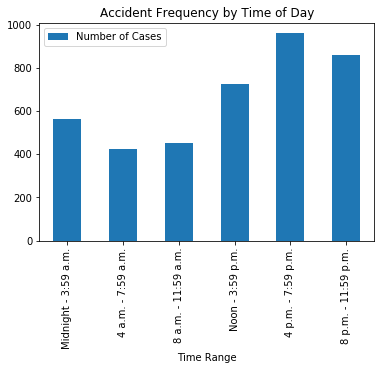

In [67]:
time_df = time_df[["Number of Cases"]]
time_df.plot(kind="bar")
plt.title("Accident Frequency by Time of Day")
plt.savefig("../Images/TimeofDay.png")

In [68]:
time_drunk = pd.DataFrame(time["Drunk Driver"].value_counts())
time_drunk

Drunk Driver
Time Range           Drunk Driver              
Midnight - 3:59 a.m. 1                      309
                     0                      234
                     2                       23
4 a.m. - 7:59 a.m.   0                      347
                     1                       80
8 a.m. - 11:59 a.m.  0                      419
                     1                       35
Noon - 3:59 p.m.     0                      652
                     1                       76
4 p.m. - 7:59 p.m.   0                      703
                     1                      258
8 p.m. - 11:59 p.m.  0                      546
                     1                      292
                     2                       23

In [69]:
none = []
none = [time_drunk["Drunk Driver"][i][0] for i in group_names]

one = []
one = [time_drunk["Drunk Driver"][i][1] for i in group_names]

two = [time_drunk["Drunk Driver"]["Midnight - 3:59 a.m."][2], time_drunk["Drunk Driver"]["8 p.m. - 11:59 p.m."][2]]
two.insert(1,0)
two.insert(2,0)
two.insert(3,0)
two.insert(4,0)
two

[23, 0, 0, 0, 0, 23]

In [70]:
max_cases = time_df["Number of Cases"].max()
max_cases

961

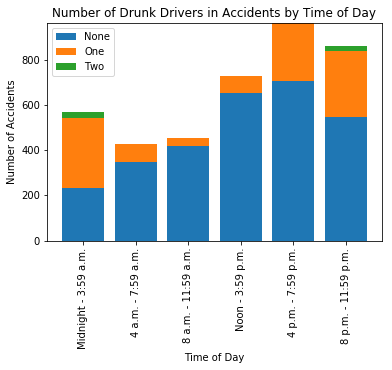

In [71]:
fig, ax = plt.subplots()

# Heights of bars1 + bars2
bars1 = np.add(none, one).tolist()

ax.bar(group_names, none, label = "None")
ax.bar(group_names, one, label = "One", bottom=none)
ax.bar(group_names, two, label = "Two", bottom=bars1)

ax.set_ylabel('Number of Accidents')
ax.set_title('Number of Drunk Drivers in Accidents by Time of Day')
ax.set_xlabel('Time of Day')
plt.xticks(rotation=90)
ax.legend()

plt.ylim(0,)
plt.savefig("../Images/DrunkDriversbyTimeofDay.png")
plt.show()

In [72]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Age,Age Name,Case Number,County,DOA Name,Day of Week,...,Accident ZIP,Unnamed: 0_y,Unnamed: 0.1_y,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode
Time Range,,,,,,,,,,,,,,,,,,,,,
Midnight - 3:59 a.m.,566,566,566,566,566,566,566,566,566,566,...,565,446,446,446,446,446,446,446,446,446
4 a.m. - 7:59 a.m.,427,427,427,427,427,427,427,427,427,427,...,427,308,308,308,308,308,308,308,308,308
8 a.m. - 11:59 a.m.,454,454,454,454,454,454,454,454,454,454,...,454,375,375,375,375,375,374,375,375,375
Noon - 3:59 p.m.,728,728,728,728,728,728,728,728,728,728,...,728,559,559,559,559,559,551,559,559,559
4 p.m. - 7:59 p.m.,961,961,961,961,961,961,961,961,961,961,...,961,703,703,703,703,703,698,703,703,703
8 p.m. - 11:59 p.m.,861,861,861,861,861,861,861,861,861,861,...,861,632,632,632,632,632,630,632,632,632


Text(0.5, 1.0, 'Accident Frequency by Time of Day')

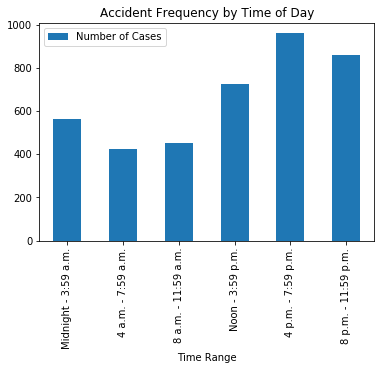

In [73]:
time_df = time_df[["Case Number"]]
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df.plot(kind="bar")
plt.title("Accident Frequency by Time of Day")

In [74]:
people_df["Sex"].value_counts()

Male                   2588
Female                 1342
Unknown                  82
Reported as Unknown      13
Not Reported              1
Name: Sex, dtype: int64

In [75]:
people_df["Sex"] = people_df["Sex"].replace({"Reported as Unknown": "Unknown",
                                            "Not Reported": "Unknown"})
gender = people_df["Sex"].value_counts()
gender

Male       2588
Female     1342
Unknown      96
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender of Driver')

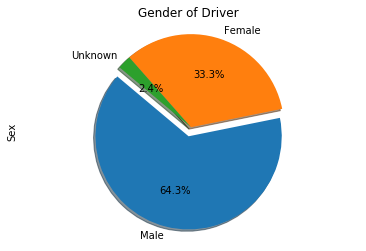

In [76]:
gender.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title("Gender of Driver")

In [77]:
death1= people_df.groupby(['Case Number','DOA Name'])
death1.head()

,Unnamed: 0,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Age,Age Name,Case Number,County,DOA Name,Day of Week,...,Unnamed: 0_y,Unnamed: 0.1_y,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Name,Zipcode,Time Range
0,0,0,0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,...,30394.0,30394.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
1,1,1,1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,...,30394.0,30394.0,31.2,18794.0,2620.0,63098.0,40772.0,ZCTA5 92108,92108.0,4 p.m. - 7:59 p.m.
2,2,2,2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,...,31575.0,31575.0,40.5,48103.0,6033.0,65168.0,29776.0,ZCTA5 92028,92028.0,4 p.m. - 7:59 p.m.
3,3,3,3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
4,4,4,4,4,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 p.m. - 7:59 p.m.
5,5,5,5,5,55,55 Years,60008,SAN DIEGO (73),Not Applicable,Monday,...,30352.0,30352.0,38.2,44406.0,5447.0,72206.0,30750.0,ZCTA5 92019,92019.0,8 p.m. - 11:59 p.m.
6,6,6,6,6,36,36 Years,60008,SAN DIEGO (73),Not Applicable,Monday,...,30352.0,30352.0,38.2,44406.0,5447.0,72206.0,30750.0,ZCTA5 92019,92019.0,8 p.m. - 11:59 p.m.
7,7,7,7,7,28,28 Years,60008,SAN DIEGO (73),Not Applicable,Monday,...,30352.0,30352.0,38.2,44406.0,5447.0,72206.0,30750.0,ZCTA5 92019,92019.0,8 p.m. - 11:59 p.m.
8,8,8,8,8,28,28 Years,60009,SAN DIEGO (73),Died at Scene,Saturday,...,29897.0,29897.0,35.6,26947.0,2850.0,66825.0,43135.0,ZCTA5 92107,92107.0,Midnight - 3:59 a.m.
9,9,9,9,9,24,24 Years,60009,SAN DIEGO (73),Not Applicable,Saturday,...,29897.0,29897.0,35.6,26947.0,2850.0,66825.0,43135.0,ZCTA5 92107,92107.0,Midnight - 3:59 a.m.


In [78]:
death1.nunique()

Unnamed: 0  Unnamed: 0_x  Unnamed: 0.1_x  \
Case Number DOA Name                                                   
60005       Died at Scene            1             1               1   
            Not Applicable           1             1               1   
60006       Died at Scene            1             1               1   
60007       Not Applicable           2             2               2   
60008       Not Applicable           3             3               3   
60009       Died at Scene            2             2               2   
            Not Applicable           2             2               2   
60010       Not Applicable           1             1               1   
60011       Not Applicable           1             1               1   
60014       Died at Scene            1             1               1   
60016       Not Applicable           2             2               2   
60017       Died at Scene            3             3               3   
60022       Died at Scene            2             2               2   
60023       Died at Scene            4             4               4   
            Not Applicable           5             5               5   
60025       Died at Scene            3             3               3   
            Not Applicable           6             6               6   
60026       Died at Scene            2             2               2   
60027       Not Applicable           2             2               2   
60028       Not Applicable           2             2               2   
60029       Died at Scene            1             1               1   
60031       Died at Scene            1             1               1   
            Not Applicable           2             2               2   
60033       Not Applicable           2             2               2   
60036       Died at Scene            2             2               2   
            Not Applicable           8             8               8   
60038       Not Applicable           2             2               2   
60039       Died at Scene            1             1               1   
            Not Applicable           2             2               2   
60042       Not Applicable           1             1               1   
...                                ...           ...             ...   
63195       Not Applicable           1             1               1   
63206       Died at Scene            2             2               2   
63214       Not Applicable           2             2               2   
63220       Not Applicable           1             1               1   
63227       Not Applicable           1             1               1   
63235       Died at Scene            1             1               1   
            Not Applicable           1             1               1   
63245       Not Applicable           1             1               1   
63248       Not Applicable           3             3               3   
63253       Not Applicable           1             1               1   
63257       Not Applicable           3             3               3   
63258       Died at Scene            1             1               1   
            Not Applicable           5             5               5   
63260       Not Applicable           1             1               1   
63261       Not Applicable           1             1               1   
63276       Died at Scene            1             1               1   
63302       Not Applicable           2             2               2   
63336       Died at Scene            1             1               1   
63395       Died at Scene            1             1               1   
            Not Applicable           7             7               7   
63418       Not Applicable           1             1               1   
63422       Not Applicable           6             6               6   
63423       Died at Scene            1             1               1

In [79]:
new = pd.DataFrame(death1.nunique())
new

Unnamed: 0  Unnamed: 0_x  Unnamed: 0.1_x  \
Case Number DOA Name                                                   
60005       Died at Scene            1             1               1   
            Not Applicable           1             1               1   
60006       Died at Scene            1             1               1   
60007       Not Applicable           2             2               2   
60008       Not Applicable           3             3               3   
60009       Died at Scene            2             2               2   
            Not Applicable           2             2               2   
60010       Not Applicable           1             1               1   
60011       Not Applicable           1             1               1   
60014       Died at Scene            1             1               1   
60016       Not Applicable           2             2               2   
60017       Died at Scene            3             3               3   
60022       Died at Scene            2             2               2   
60023       Died at Scene            4             4               4   
            Not Applicable           5             5               5   
60025       Died at Scene            3             3               3   
            Not Applicable           6             6               6   
60026       Died at Scene            2             2               2   
60027       Not Applicable           2             2               2   
60028       Not Applicable           2             2               2   
60029       Died at Scene            1             1               1   
60031       Died at Scene            1             1               1   
            Not Applicable           2             2               2   
60033       Not Applicable           2             2               2   
60036       Died at Scene            2             2               2   
            Not Applicable           8             8               8   
60038       Not Applicable           2             2               2   
60039       Died at Scene            1             1               1   
            Not Applicable           2             2               2   
60042       Not Applicable           1             1               1   
...                                ...           ...             ...   
63195       Not Applicable           1             1               1   
63206       Died at Scene            2             2               2   
63214       Not Applicable           2             2               2   
63220       Not Applicable           1             1               1   
63227       Not Applicable           1             1               1   
63235       Died at Scene            1             1               1   
            Not Applicable           1             1               1   
63245       Not Applicable           1             1               1   
63248       Not Applicable           3             3               3   
63253       Not Applicable           1             1               1   
63257       Not Applicable           3             3               3   
63258       Died at Scene            1             1               1   
            Not Applicable           5             5               5   
63260       Not Applicable           1             1               1   
63261       Not Applicable           1             1               1   
63276       Died at Scene            1             1               1   
63302       Not Applicable           2             2               2   
63336       Died at Scene            1             1               1   
63395       Died at Scene            1             1               1   
            Not Applicable           7             7               7   
63418       Not Applicable           1             1               1   
63422       Not Applicable           6             6               6   
63423       Died at Scene            1             1               1

In [80]:
new2=pd.DataFrame(new,columns =['Case Number'])
new2

Case Number
Case Number DOA Name                   
60005       Died at Scene             1
            Not Applicable            1
60006       Died at Scene             1
60007       Not Applicable            1
60008       Not Applicable            1
60009       Died at Scene             1
            Not Applicable            1
60010       Not Applicable            1
60011       Not Applicable            1
60014       Died at Scene             1
60016       Not Applicable            1
60017       Died at Scene             1
60022       Died at Scene             1
60023       Died at Scene             1
            Not Applicable            1
60025       Died at Scene             1
            Not Applicable            1
60026       Died at Scene             1
60027       Not Applicable            1
60028       Not Applicable            1
60029       Died at Scene             1
60031       Died at Scene             1
            Not Applicable            1
60033       Not Applicable            1
60036       Died at Scene             1
            Not Applicable            1
60038       Not Applicable            1
60039       Died at Scene             1
            Not Applicable            1
60042       Not Applicable            1
...                                 ...
63195       Not Applicable            1
63206       Died at Scene             1
63214       Not Applicable            1
63220       Not Applicable            1
63227       Not Applicable            1
63235       Died at Scene             1
            Not Applicable            1
63245       Not Applicable            1
63248       Not Applicable            1
63253       Not Applicable            1
63257       Not Applicable            1
63258       Died at Scene             1
            Not Applicable            1
63260       Not Applicable            1
63261       Not Applicable            1
63276       Died at Scene             1
63302       Not Applicable            1
63336       Died at Scene             1
63395       Died at Scene             1
            Not Applicable            1
63418       Not Applicable            1
63422       Not Applicable            1
63423       Died at Scene             1
63440       Not Applicable            1
63441       Not Applicable            1
63474       Not Applicable            1
63518       Not Applicable            1
63569       Not Applicable            1
63582       Not Applicable            1
63617       Died at Scene             1

[1828 rows x 1 columns]

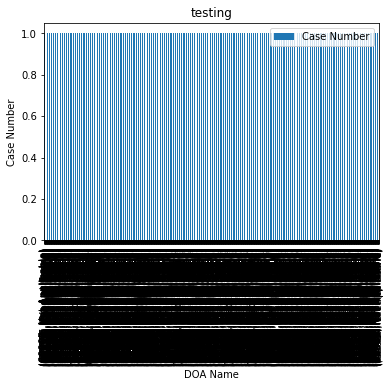

In [81]:

chart = new2.plot(kind="bar", title="testing")
chart.set_xlabel("DOA Name")
chart.set_ylabel("Case Number")

plt.show()


In [82]:
# Prepare for boxplot and ANOVA of age by number of drunk drivers
people_df.dtypes

Unnamed: 0                    int64
Unnamed: 0_x                  int64
Unnamed: 0.1_x                int64
Unnamed: 0.1.1                int64
Age                           int64
Age Name                     object
Case Number                   int64
County                       object
DOA Name                     object
Day of Week                  object
Death Day of Month           object
Description of Veh Coll      object
Drunk Driver                  int64
Hour                          int64
Injury Severity Name         object
Lat                         float64
Lng                         float64
Make                         object
Make/Model                   object
Model                        object
Month                        object
Race                         object
Road Type                    object
Sex                          object
Speed Limit Exceeded         object
Speed limit                   int64
Time of Accident             object
Traveled Speed Veh          

In [83]:
people_df["Age"] = pd.to_numeric(people_df["Age"], errors='coerce')
people_df.dtypes

Unnamed: 0                    int64
Unnamed: 0_x                  int64
Unnamed: 0.1_x                int64
Unnamed: 0.1.1                int64
Age                           int64
Age Name                     object
Case Number                   int64
County                       object
DOA Name                     object
Day of Week                  object
Death Day of Month           object
Description of Veh Coll      object
Drunk Driver                  int64
Hour                          int64
Injury Severity Name         object
Lat                         float64
Lng                         float64
Make                         object
Make/Model                   object
Model                        object
Month                        object
Race                         object
Road Type                    object
Sex                          object
Speed Limit Exceeded         object
Speed limit                   int64
Time of Accident             object
Traveled Speed Veh          

In [84]:
people_df_age = people_df.dropna()
people_df_age = people_df_age[people_df_age.Age != 998]
people_df_age = people_df_age[people_df_age.Age != 999]
print(len(people_df_age))

1200


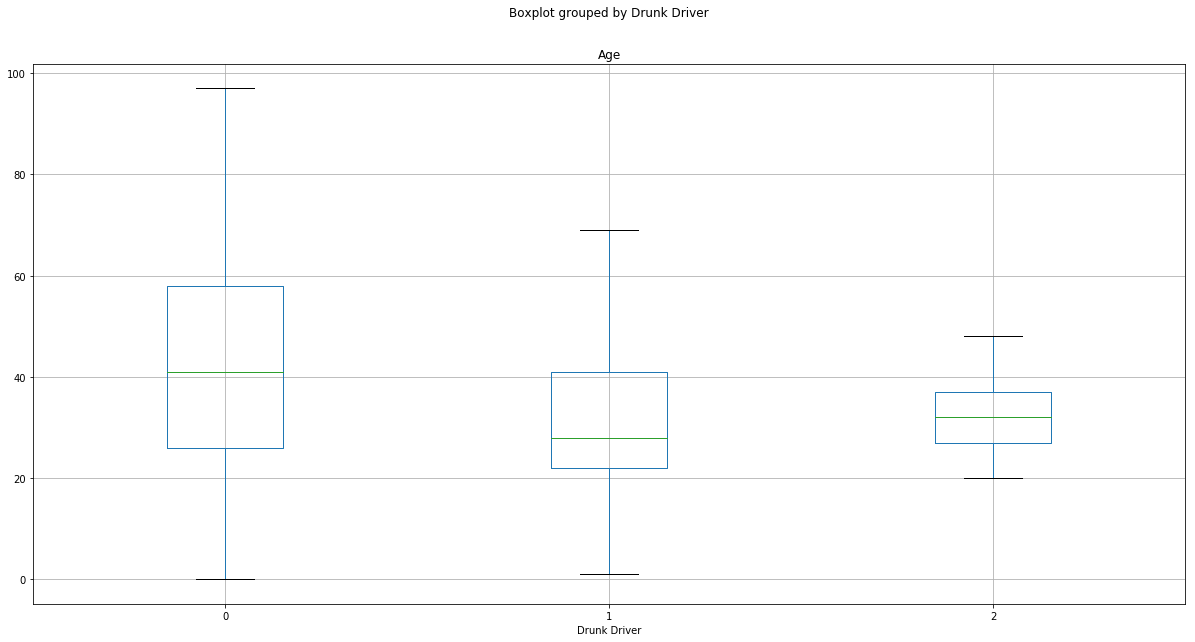

In [85]:
# Create a boxplot to compare means
people_df_age.boxplot("Age", by="Drunk Driver", figsize=(20, 10))
plt.savefig("../Images/AgeBoxplot.png")

In [144]:
from scipy import stats as st

# Extract individual groups
none = people_df_age[people_df_age["Drunk Driver"] == 0]["Age"]
one = people_df_age[people_df_age["Drunk Driver"] == 1]["Age"]
two = people_df_age[people_df_age["Drunk Driver"] == 2]["Age"]

In [87]:
# Perform the ANOVA
stats.f_oneway(none, one, two)

F_onewayResult(statistic=36.803020887073075, pvalue=3.081880103274506e-16)

In [126]:
people_df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1_x', 'Unnamed: 0.1.1', 'Age',
       'Age Name', 'Case Number', 'County', 'DOA Name', 'Day of Week',
       'Death Day of Month', 'Description of Veh Coll', 'Drunk Driver', 'Hour',
       'Injury Severity Name', 'Lat', 'Lng', 'Make', 'Make/Model', 'Model',
       'Month', 'Race', 'Road Type', 'Sex', 'Speed Limit Exceeded',
       'Speed limit', 'Time of Accident', 'Traveled Speed Veh',
       'Type of Vehicle', 'Vin Number', 'Year', 'ZIP Code', 'Accident ZIP',
       'Unnamed: 0_y', 'Unnamed: 0.1_y', 'Median Age', 'Population',
       'Poverty Count', 'Household Income', 'Per Capita Income', 'Name',
       'Zipcode', 'Time Range'],
      dtype='object')

In [153]:
populated_zips = people_df[people_df['Population'] > 0]
group = populated_zips.groupby(['ZIP Code', 'Year'])
# accidents per capita
group_populations = group.max()['Population']
group_capita_income = group.max()['Per Capita Income']
group_median_age = group.max()['Median Age']
total_drunk_drivers = group.sum()['Drunk Driver']
acc_per_capita = group.count()['Case Number'] / group_populations

In [166]:
df = pd.DataFrame([acc_per_capita, group_populations]).T.rename(columns={
    'Unnamed 0': 'Death Rate'
})
st.linregress(group_populations, acc_per_capita)

LinregressResult(slope=-1.2911847986205099e-08, intercept=0.0008151888335662125, rvalue=-0.39159557481776425, pvalue=2.2973659522061227e-27, stderr=1.141828766140847e-09)

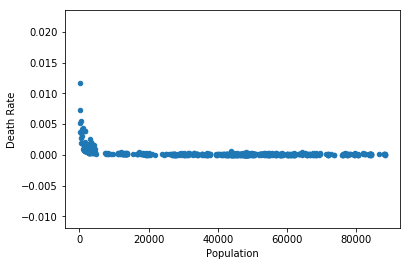

In [167]:
df.plot('Population', 'Death Rate', kind='scatter')

In [168]:
dd_rate = total_drunk_drivers / group_populations
df = pd.DataFrame([dd_rate, group_populations]).T.rename(columns={
    'Unnamed 0': 'Drunk Driver Rate',
})
st.linregress(group_populations, dd_rate)

LinregressResult(slope=-2.7840710933310873e-09, intercept=0.00018381063164126958, rvalue=-0.22124290059937382, pvalue=2.6751968092930402e-09, stderr=4.6186033093537027e-10)

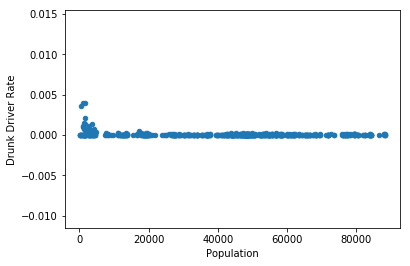

In [169]:
df.plot('Population', 'Drunk Driver Rate', kind='scatter')

In [170]:
df = pd.DataFrame([dd_rate, group_capita_income]).T.rename(columns={
    'Unnamed 0': 'Drunk Driver Rate',
})
st.linregress(group_capita_income, dd_rate)

LinregressResult(slope=-2.2629245356572305e-11, intercept=6.438867885682203e-05, rvalue=-0.0011460990380541332, pvalue=0.9757146793136272, stderr=7.430966227328663e-10)

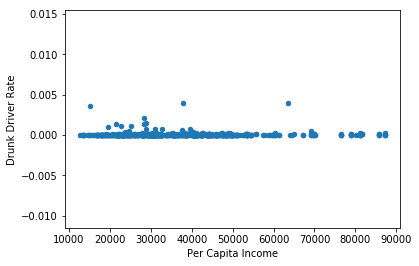

In [171]:
df.plot('Per Capita Income', 'Drunk Driver Rate', kind='scatter')

In [172]:
df = pd.DataFrame([dd_rate, group_median_age]).T.rename(columns={
    'Unnamed 0': 'Drunk Driver Rate',
})
st.linregress(group_median_age, dd_rate)

LinregressResult(slope=2.011899874235133e-06, intercept=-1.492402268549436e-05, rvalue=0.051108250425181134, pvalue=0.17434091332729137, stderr=1.4796025005424729e-06)

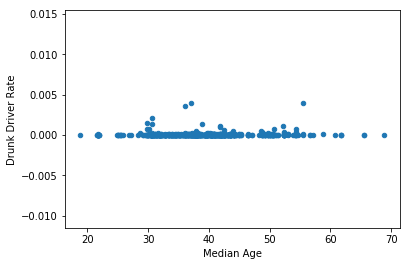

In [173]:
df.plot('Median Age', 'Drunk Driver Rate', kind='scatter')

In [174]:
df = pd.DataFrame([acc_per_capita, group_median_age]).T.rename(columns={
    'Unnamed 0': 'Accident Rate',
})
st.linregress(group_median_age, acc_per_capita)

LinregressResult(slope=2.5611965057914267e-05, intercept=-0.0007414405558261775, rvalue=0.24830639221449682, pvalue=2.0764370588727603e-11, stderr=3.7603968139133575e-06)

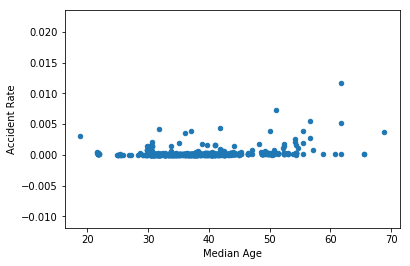

In [175]:
drunk_rate.plot('Median Age', 'Accident Rate', kind='scatter')